<a href="https://colab.research.google.com/github/barbarosugurkan/kahvelab-beam-analysis/blob/main/2025-07-06/2025-07-06_ibsimu_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

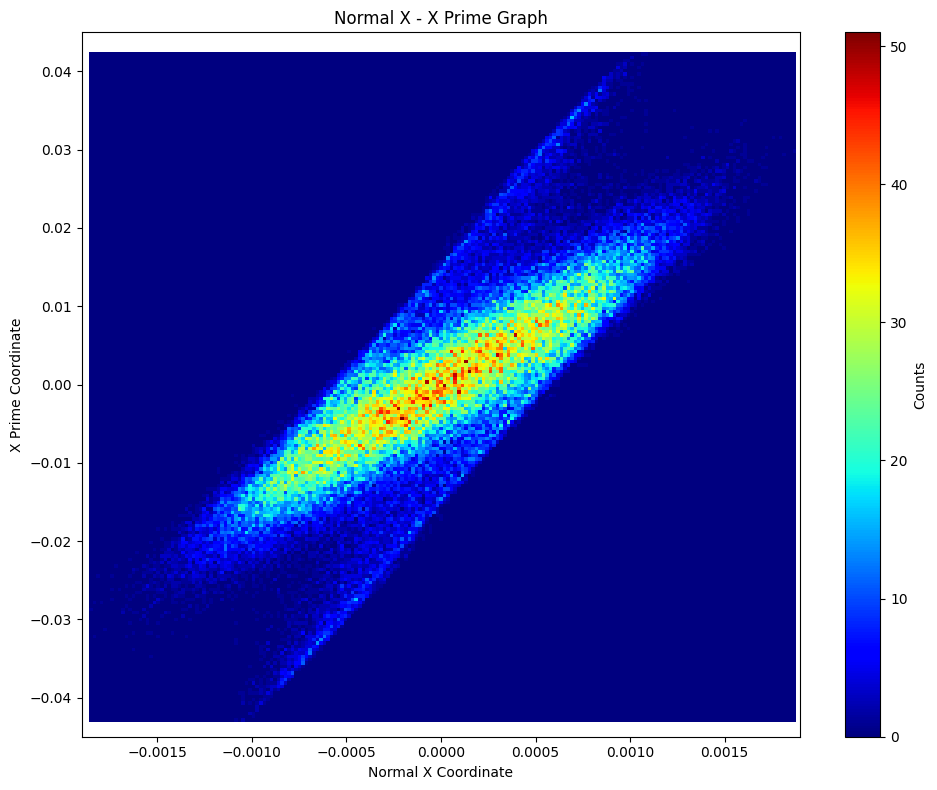

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

col_names = ["idx","x","xprime","y","yprime"]
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/0.02-100k.txt",
                 skiprows=8,
                 sep=r"\s+",
                 engine="python",
                 names=col_names,
                 usecols=range(5),)
df = df.set_index("idx")

#Liste halinde yazdım
x_list = list(df["x"])
xprime_list = list(df["xprime"])
y_list = list(df["y"])
yprime_list = list(df["yprime"])

#Matplotlib ile 2D Heat Map

bins = 200 #200x200lik bi kutu

plt.figure(figsize=(10, 8)) # Grafiğin boyutunu ayarlayın

hist, xedges, yedges, im = plt.hist2d(df['x'], df['xprime'],bins=bins, cmap='jet')
#ilk iki parametre veriler, sonraki bin sayısı zaten, cmap renk skalası bizde jet kullanılmış, cmin de o değerden kaç tane varsa plota koyualcağı

plt.colorbar(label='Counts') # Sağdaki renk skalasını ve etiketini ekle
plt.xlabel('Normal X Coordinate')
plt.ylabel('X Prime Coordinate')
plt.title("Normal X - X Prime Graph")
plt.grid(False) # Izgara çizgilerini kaldırın, orijinal grafikte yok
plt.xlim(-0.0019, 0.0019) # X ekseni sınırlarını ayarlayın
plt.ylim(-0.045, 0.045) # Y ekseni sınırlarını ayarlayın
#plt.gca().set_aspect('equal', adjustable='box') # X ve Y eksen oranlarını eşitler (bunu x-xprime ve y-yprime için devre dışı bıraktım)

plt.tight_layout() # Grafiğin düzgün sığmasını sağlar
plt.show()

#NOTLAR: x-y grafiği için eksenler +-0.0019 aralığında
#ancak x-xprime ve y-yprime için ise xprime ve yprime +-0.045 aralığında gidiyo yani aynı ölçekte değil eksenler

In [ ]:
import math

rms_emittans_x = math.sqrt(df["x"].var()*df["xprime"].var()-df["x"].cov(df["xprime"])**2)
rms_emittans_y = math.sqrt(df["y"].var()*df["yprime"].var()-df["y"].cov(df["yprime"])**2)


print(rms_emittans_x)
print(rms_emittans_y)

3.7484293078223687e-06
3.750520822389695e-06
